In [3]:
from time_series_functions import *

ModuleNotFoundError: No module named 'plotly'

In [11]:
a1, a2, a3 = 0.5, 0.5, 0.1
b1, b2, b3 = 0.25, 0.5, 0.0
c1, c2, c3 = 0.25, 0.0, 0.5

A = np.array([
    [a1, a2, a3],
    [b1, b2, b3],
    [c1, c2, c3]
])

A_list_complex = [A]

T = 1024
x = generate_var_process(A_list_complex, T, 1000)
x = x - np.mean(x, axis=1, keepdims=True)

plot_time_series(x)


NameError: name 'go' is not defined

In [5]:
import numpy as np

def find_missing_edges(A_list):
    zero_entries = set()
    for A in A_list:
        n = A.shape[0]
        for j in range(n):
            for k in range(j + 1, n):  # ensuring j < k
                if A[j, k] == 0 and A[k, j] == 0:
                    zero_entries.add((j, k))
    return zero_entries

# Example usage:
A_list_bigger = [np.array([
    [0.3, 0.0, 0.2, 0.0, 0.0],
    [0.0, 0.3, 0.2, 0.2, 0.0],
    [0.2, 0.2, 0.3, 0.2, 0.2],
    [0.0, 0.2, 0.2, 0.3, 0.2],
    [0.0, 0.0, 0.2, 0.2, 0.3]
])]

zero_entries = find_missing_edges(A_list_bigger)
print("Zero entries where both A[j, k] and A[k, j] are zero:")
print(zero_entries)

Zero entries where both A[j, k] and A[k, j] are zero:
{(0, 1), (0, 3), (0, 4), (1, 4)}


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_graph(num_vertices, pred_edges, true_edges):
    """
    Plot a graph structure given a number of vertices, predicted edges, and true edges.

    Parameters:
    num_vertices (int): The number of vertices.
    pred_edges (set of tuples): A set of tuples representing predicted edges between nodes.
    true_edges (set of tuples): A set of tuples representing true edges between nodes.
    """


    # Create a NetworkX graph
    G = nx.Graph()
    G.add_nodes_from(range(num_vertices))  # Ensure all vertices are added
    G.add_edges_from(pred_edges | true_edges)

    # Determine edge colors based on their presence in true_edges and pred_edges
    edge_colors = []
    for edge in G.edges():
        if edge in true_edges and edge in pred_edges:
            edge_colors.append('green')  # edge present in both true_edges and pred_edges
        elif edge in pred_edges:
            edge_colors.append('blue')   # edge only in pred_edges
        elif edge in true_edges:
            edge_colors.append('orange')  # edge only in true_edges
            
    # Rename nodes to X0, X1, X2, ...
    mapping = {node: f"X{node}" for node in G.nodes()}
    G = nx.relabel_nodes(G, mapping)
            
    print(G.edges())
    print(edge_colors)

    # Draw the graph
    pos = nx.circular_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color=edge_colors)

    plt.draw()

[('X0', 'X1'), ('X0', 'X3'), ('X0', 'X4'), ('X1', 'X4')]
['green', 'green', 'green', 'green']


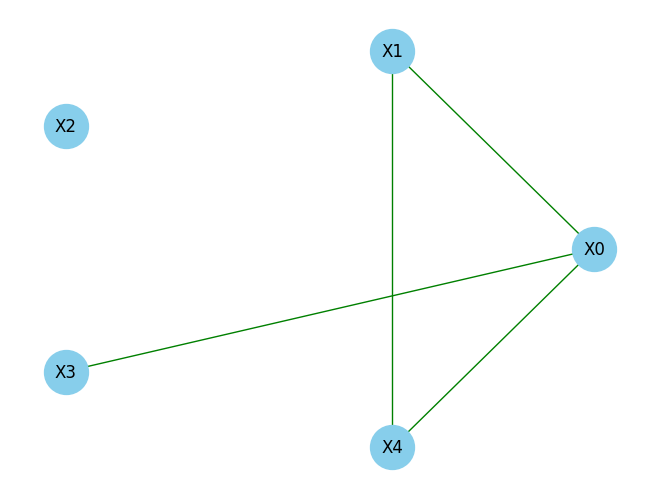

In [19]:
plot_graph(5, zero_entries, zero_entries)

In [22]:
A_list_7x7_stationary = [np.array([
    [ 0.25,  0.10, -0.10,  0.05, -0.05,  0.10, -0.15],
    [ 0.10,  0.20,  0.05, -0.10,  0.05,  0.15, -0.10],
    [-0.10,  0.05,  0.30,  0.10, -0.15,  0.05,  0.10],
    [ 0.05, -0.10,  0.10,  0.25,  0.10, -0.15,  0.05],
    [-0.05,  0.05, -0.15,  0.10,  0.20,  0.10, -0.10],
    [ 0.10,  0.15,  0.05, -0.15,  0.10,  0.25,  0.05],
    [-0.15, -0.10,  0.10,  0.05, -0.10,  0.05,  0.30]
])]

# Check if the matrix is stationary
eigenvalues = np.linalg.eigvals(A_list_7x7_stationary[0])
print("Eigenvalues:", eigenvalues)
print("Stationary:", all(np.abs(eigenvalues) < 1))

Eigenvalues: [-0.17003515  0.62475964  0.02335355  0.19635816  0.46808738  0.2872772
  0.32019923]
Stationary: True
